In [259]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Set the directory containing the image files
directory = 'path_to_your_directory'

# Initialize an empty matrix
N = 4  # Adjust this based on your grid size
matrix = np.zeros((2, 2, N, N))
assignmentCount = np.zeros((2, N, N))


# Function to parse the filename and update the matrix
def parse_filename(filename):
    base = os.path.basename(filename)
    name, _ = os.path.splitext(base)
    x, y, a, b = map(float, name.split('_'))
    x, y = int(x), int(y)

    # Handle periodic boundary conditions
    if abs(x - y) == N-1 or abs(x - y) == N*(N-1):
        x_row, x_col = divmod(max(x, y), N)
    else:
        x_row, x_col = divmod(min(x, y), N)

    if abs(x - y) == 1 and (min(x,y)+1)%N != 0:  # Horizontal connection
        print(x,y, f"[0, {x_row}, {x_col}]", assignmentCount[0, x_row, x_col])
        if assignmentCount[0, x_row, x_col] > 0:
            print("#####################################################################################")
            assert  matrix[0, 0, x_row, x_col] == a and matrix[0, 1, x_row, x_col] == b, f"{x}, {y}, [{x_row}, {x_col}], {matrix[0, 0, x_row, x_col]} != {a}, {matrix[0, 1, x_row, x_col]} != {b}"
        matrix[0, 0, x_row, x_col] = a
        matrix[0, 1, x_row, x_col] = b
        assignmentCount[0, x_row, x_col] += 1        
        assert np.all(assignmentCount) < 2,f"{x}, {y}, [{x_row}, {x_col}], {assignmentCount[assignmentCount > 2]}"
    elif abs(x - y) == N-1:
        print(x,y, f"[0, {x_row}, {x_col}]", assignmentCount[0, x_row, x_col])
        if assignmentCount[0, x_row, x_col] > 0:
            print("#####################################################################################")
            assert  matrix[0, 0, x_row, x_col] == b and matrix[0, 1, x_row, x_col] == a, f"{x}, {y}, [{x_row}, {x_col}], {matrix[0, 0, x_row, x_col]} != {b}, {matrix[0, 1, x_row, x_col]} != {a} "
        matrix[0, 0, x_row, x_col] = b
        matrix[0, 1, x_row, x_col] = a
        assignmentCount[0, x_row, x_col] += 1
        assert np.all(assignmentCount) < 2,f"{x}, {y}, [{x_row}, {x_col}], {assignmentCount[assignmentCount > 2]}"
    elif abs(x - y) == N:  # Vertical connection
        print(x,y, f"[1, {x_row}, {x_col}]", assignmentCount[0, x_row, x_col])
        if assignmentCount[1, x_row, x_col] > 0:
            print("#####################################################################################")
            assert  matrix[1, 0, x_row, x_col] == b and matrix[1, 1, x_row, x_col] == a, f"{x}, {y}, [{x_row}, {x_col}]"
        matrix[1, 0, x_row, x_col] = b
        matrix[1, 1, x_row, x_col] = a
        assignmentCount[1, x_row, x_col] += 1
        assert np.all(assignmentCount) < 2,f"{x}, {y}, [{x_row}, {x_col}], {assignmentCount[assignmentCount > 2]}"
    elif abs(x - y) == N*(N-1):
        print(x,y, f"[1, {x_row}, {x_col}]", assignmentCount[0, x_row, x_col])
        if assignmentCount[1, x_row, x_col] > 0:
            print("#####################################################################################")
            assert  matrix[1, 0, x_row, x_col] == a and matrix[1, 1, x_row, x_col] == b, f"{x}, {y}, [{x_row}, {x_col}]"
        matrix[1, 0, x_row, x_col] = a
        matrix[1, 1, x_row, x_col] = b
        assignmentCount[1, x_row, x_col] += 1
        assert np.all(assignmentCount) < 2,f"{x}, {y}, [{x_row}, {x_col}], {assignmentCount[assignmentCount > 2]}"
    else:
        # assert False, "impossible connectivity found! you idiot!"
        print("impossible connectivity found! you idiot!")



tmpNames = []
for i in range(N**2):
    for j in range(N**2):
        tmpNames.append(f"{i}_{j}_{i/N/N}_{j/N/N}.png")
        
# np.random.shuffle(tmpNames)
        
for n in tmpNames:
    # parse_filename("2_0_0.5_1.png")
    parse_filename(n)

# Loop through all files in the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.png'):
#         parse_filename(os.path.join(directory, filename))

# # Now the matrix is filled with the values from the filenames
# print(matrix)


impossible connectivity found! you idiot!
0 1 [0, 0, 0] 0.0
impossible connectivity found! you idiot!
0 3 [0, 0, 3] 0.0
0 4 [1, 0, 0] 1.0
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
0 12 [1, 3, 0] 0.0
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
impossible connectivity found! you idiot!
1 0 [0, 0, 0] 1.0
#####################################################################################


AssertionError: 1, 0, [0, 0], 0.0 != 0.0625, 0.0625 != 0.0

In [250]:
matrix[1,1,3,3]

0.1875

In [224]:
for t in tmpNames:
    if "1_4" in t:
        print(t)

1_4_0.0625_0.25.png
11_4_0.6875_0.25.png


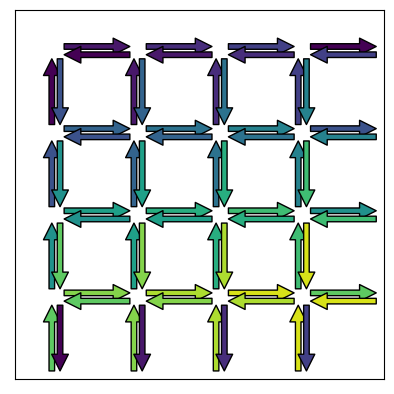

In [202]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set up the grid
points = np.arange(N * N).reshape(N, N)

offset = 0.05
shrinkage = 0.1

# Draw the arrows based on the matrix values
for i in range(N):
    for j in range(N):
        # Horizontal arrows
        right_val = matrix[0, 0, i, j]
        left_val = matrix[0, 1, i, j]
        
        ax.annotate("", xy=(j + 1, N - 1 - i + offset), xytext=(j, N - 1 - i + offset), 
                    arrowprops=dict(facecolor=plt.cm.viridis(right_val), shrink=shrinkage))
        ax.annotate("", xy=(j, N - 1 - i - offset), xytext=(j + 1, N - 1 - i - offset), 
                    arrowprops=dict(facecolor=plt.cm.viridis(left_val), shrink=shrinkage))
        
        
        # Vertical arrows
        up_val = matrix[1, 0, i, j]
        down_val = matrix[1, 1, i, j]
        
        ax.annotate("", xy=(j - offset, N - 1 - i), xytext=(j - offset, N - 1 - i - 1), 
                    arrowprops=dict(facecolor=plt.cm.viridis(up_val), shrink=shrinkage))
        ax.annotate("", xy=(j + offset, N - 1 - i - 1), xytext=(j + offset, N - 1 - i), 
                    arrowprops=dict(facecolor=plt.cm.viridis(down_val), shrink=shrinkage))

    
# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set axis limits
ax.set_xlim(-0.5, N)
ax.set_ylim(-1, N-0.5)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Add grid
ax.grid(True)

# Show the plot
# plt.imsave(os.path.join(directory, "barriers.png"))
plt.show()


In [266]:
import os

targetDir = "/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease/barriers/sys2"

count = 1
for i in range(16):
    for j in range(16):
        tmpDir = os.path.join(targetDir, str(count))
        os.makedirs(tmpDir, exist_ok=True)
        plt.imsave(os.path.join(tmpDir, f"{i}_{j}_{i*j/15/15/1.02}_{i*j/15/15}.png"), np.zeros((3,3,3)))
        # tmpNames.append()
        count += 1

In [162]:
!pwd

16931.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease/Liquid
